In [1]:
#Importing the relevant modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
os.chdir(r'C:\Users\danie\Desktop')

In [2]:
#loading the dataset
boston = datasets.load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [3]:
#Scaler and splitting the dataset
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
#scaling the dataset
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [5]:
#look at the scaled features
X_train_sc[:1]

array([[-0.42054453,  0.41117689, -0.84923313, -0.26761547, -1.01738819,
        -0.41137017, -0.84232131,  1.43402272, -0.66564317, -1.01296752,
        -0.81846496,  0.44047695,  0.05497058]])

In [6]:
#bulding the tf keras model
model = Sequential()

model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(8, activation='relu'))

# regression - no activation function in the last layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 28)                392       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                377       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# patience: number of epochs that produced the monitored quantity with no improvement after which training will be stopped.
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience=15)

# save the best model ( = lowest mse) to a file 'best_model.hdf5'
modelCheckpoint = ModelCheckpoint('my_model.h5', save_best_only = True)

# pass the above callbacks to callbacks parameter
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), callbacks=[monitor_val_acc, modelCheckpoint], epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 13ms/step - loss: 542.6849 - val_loss: 722.2018
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 526.9021 - val_loss: 699.1749
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 504.0596 - val_loss: 664.2163
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 468.3319 - val_loss: 607.9411
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 411.5866 - val_loss: 519.9499
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 327.9376 - val_loss: 393.1820
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 222.2267 - val_loss: 242.8678
Epoch 8/500
13/13 [==============================] - 0s 5ms/step - loss: 121.4600 - val_loss: 127.1731
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 75.3368 - val_loss: 86.8582
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 

13/13 [==============================] - 0s 5ms/step - loss: 9.9563 - val_loss: 14.4290
Epoch 81/500
13/13 [==============================] - 0s 4ms/step - loss: 9.9475 - val_loss: 14.6583
Epoch 82/500
13/13 [==============================] - 0s 3ms/step - loss: 9.8264 - val_loss: 14.6778
Epoch 83/500
13/13 [==============================] - 0s 3ms/step - loss: 9.7034 - val_loss: 14.6120
Epoch 84/500
13/13 [==============================] - 0s 5ms/step - loss: 9.7294 - val_loss: 14.3234
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 9.5908 - val_loss: 14.6072
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 9.6450 - val_loss: 14.3312
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4974 - val_loss: 14.6896
Epoch 88/500
13/13 [==============================] - 0s 5ms/step - loss: 9.6003 - val_loss: 13.9273
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 9.3434 - val_loss: 14.5917
Epo

13/13 [==============================] - 0s 3ms/step - loss: 5.7676 - val_loss: 13.5850
Epoch 161/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8056 - val_loss: 13.4418
Epoch 162/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8880 - val_loss: 13.8462
Epoch 163/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6198 - val_loss: 13.5205
Epoch 164/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6699 - val_loss: 13.4600
Epoch 165/500
13/13 [==============================] - 0s 4ms/step - loss: 5.6882 - val_loss: 13.8805
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6744 - val_loss: 13.3032
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5095 - val_loss: 13.6065
Epoch 168/500
13/13 [==============================] - 0s 4ms/step - loss: 5.4672 - val_loss: 13.3947
Epoch 169/500
13/13 [==============================] - 0s 5ms/step - loss: 5.4138 - val_loss: 13

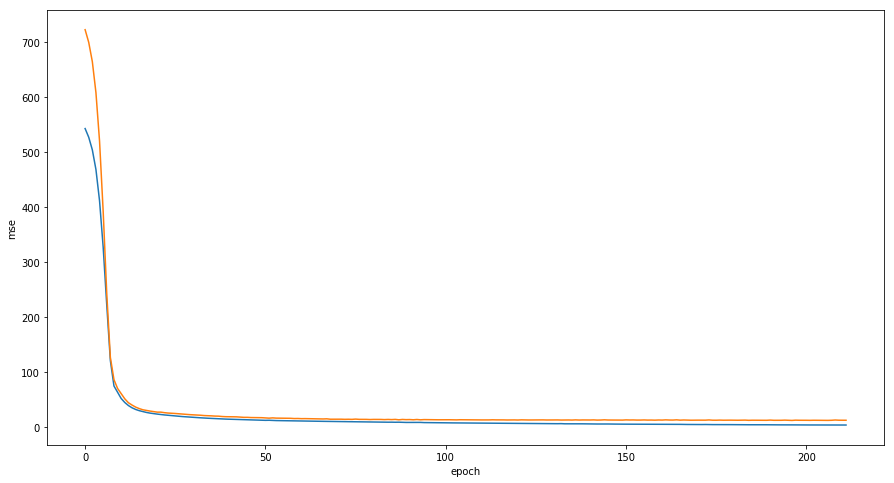

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][0:])
plt.plot(model.history.history['val_loss'][0:])

In [12]:
#checking the result
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_sc)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(round(mae * 1000, 2))
print(f"mse {round(mse, 2)}")

2502.65
mse 13.12


In [10]:
#model.save('boston.h5')

In [14]:
#export the dataset
df = pd.DataFrame(X_test_sc,columns=boston['feature_names'])
df['target'] = y
df.to_excel('boston_house_price.xlsx',index=False)